In [69]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, SimpleRNN
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorboard.plugins import projector
from sklearn.model_selection import train_test_split

from tensorflow.keras import backend as K
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))
import csv
import os

In [2]:
f = open("DIAMOND_I_battle_data.csv")
rdr = csv.reader(f)
r = list(rdr)
f.close()

In [38]:
sentence = []
label = []

for _r in r[1:]:
    _sentence = ""
    flag = 0
    gamenum = _r[0]
    augments = []
    for ag in _r[1:4]:
        if "Augment" in ag:
            augments.append(ag)
    placement = _r[len(augments) + 1]
    champ_items = []
    for ci in _r[len(augments) + 2:]:
        if len(ci) > 0:
            champ_items.append(ci)
    champ_items = sorted(champ_items)
    
    for i in range(len(champ_items)):
        champ_items[i] = champ_items[i].replace('"', "").replace('[', "").replace("]", "").replace("'", "").replace(" ", "").split(",")
        if "TFT6" in champ_items[i][0]:
            flag = -1
        champ_items[i] = champ_items[i][0:1] + sorted(champ_items[i][2:])
    
    for i in range(len(champ_items)):
        _sentence = ""
        for j in range(len(champ_items)):
            if j != i:
                _sentence += "-".join(champ_items[j][0:1]) + " "# + " ".join(champ_items[j][2:]) + " "
        if flag == 0:
            sentence.append(_sentence)
            label.append(champ_items[i][0])
        
    '''
    for i in range(3):
        try:
            _sentence += augments[i] + " "
        except:
            _sentence += "noaugment" + " "
            pass
    
    if flag == 0:
        sentence.append(_sentence)
        label.append(int(placement))
    '''
data = pd.DataFrame(zip(sentence, label), columns = ['sentence', 'label'])

tokenizer = Tokenizer(filters = '', lower = False)
tokenizer.fit_on_texts(data['sentence'])
word_dic = tokenizer.word_index
word_count = tokenizer.word_counts

In [39]:
# 중복 제거
#data = data.drop_duplicates(keep='first')

# 학습, 테스트 데이터 스플릿
x_data, y_data = data['sentence'], data['label']
y_category = []
for i in range(len(y_data)):
    y_category.append(word_dic[y_data[i]])
y_category = to_categorical(y_category)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_category, test_size=0.2, random_state=0, stratify=y_data)

# 학습, 테스트 데이터 토큰화, 패딩
sequences = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)
input_length = 42
x_train_encoded = pad_sequences(sequences, maxlen = input_length, padding = 'post')
x_test_encoded = pad_sequences(sequences_test, maxlen = input_length, padding = 'post')
vocab_size = len(word_dic) + 1

In [78]:
if not os.path.exists('/model'):
    os.makedirs('/model')

# 모델 구축
model = Sequential()
embedding = model.add(Embedding(vocab_size, 10, input_length = input_length))
model.add(LSTM(30, activation = 'tanh'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(vocab_size, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])
history = model.fit(x_train_encoded, y_train, epochs=100, batch_size=100, validation_split=0.2)
model.save('model/my_model.h5')

Epoch 1/100
1947/1947 [==============================] - 56s 26ms/step - loss: 3.5745 - accuracy: 0.0686 - val_loss: 3.3136 - val_accuracy: 0.1056
Epoch 2/100
1947/1947 [==============================] - 52s 27ms/step - loss: 3.1704 - accuracy: 0.1229 - val_loss: 3.1027 - val_accuracy: 0.1533
Epoch 3/100
1947/1947 [==============================] - 52s 27ms/step - loss: 2.9976 - accuracy: 0.1711 - val_loss: 2.9748 - val_accuracy: 0.1717
Epoch 4/100
1947/1947 [==============================] - 52s 27ms/step - loss: 2.8839 - accuracy: 0.2013 - val_loss: 2.8592 - val_accuracy: 0.2031
Epoch 5/100
1947/1947 [==============================] - 54s 28ms/step - loss: 2.8100 - accuracy: 0.2352 - val_loss: 2.7753 - val_accuracy: 0.2546
Epoch 6/100
1947/1947 [==============================] - 52s 27ms/step - loss: 2.7435 - accuracy: 0.2609 - val_loss: 2.7188 - val_accuracy: 0.2688
Epoch 7/100
1947/1947 [==============================] - 51s 26ms/step - loss: 2.6834 - accuracy: 0.2778 - val_loss: 2

1947/1947 [==============================] - 58s 30ms/step - loss: 1.9447 - accuracy: 0.5204 - val_loss: 1.9986 - val_accuracy: 0.5084
Epoch 57/100
1947/1947 [==============================] - 64s 33ms/step - loss: 1.9401 - accuracy: 0.5217 - val_loss: 2.0011 - val_accuracy: 0.5114
Epoch 58/100
1947/1947 [==============================] - 61s 32ms/step - loss: 1.9364 - accuracy: 0.5228 - val_loss: 1.9873 - val_accuracy: 0.5125
Epoch 59/100
1947/1947 [==============================] - 61s 31ms/step - loss: 1.9325 - accuracy: 0.5241 - val_loss: 1.9859 - val_accuracy: 0.5170
Epoch 60/100
1947/1947 [==============================] - 62s 32ms/step - loss: 1.9295 - accuracy: 0.5245 - val_loss: 1.9876 - val_accuracy: 0.5171
Epoch 61/100
1947/1947 [==============================] - 60s 31ms/step - loss: 1.9257 - accuracy: 0.5256 - val_loss: 1.9740 - val_accuracy: 0.5203
Epoch 62/100
1947/1947 [==============================] - 61s 32ms/step - loss: 1.9215 - accuracy: 0.5271 - val_loss: 1.9812 

1901/1901 [==============================] - 11s 5ms/step


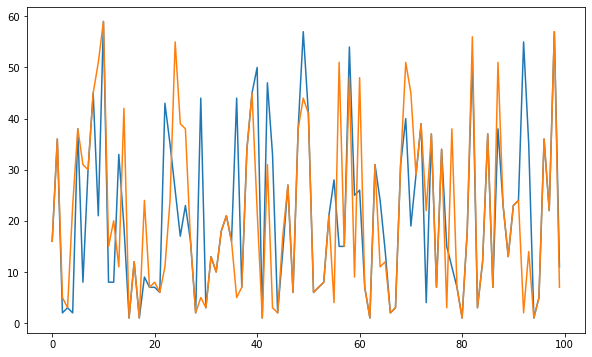

In [79]:
model.evaluate(x_test_encoded, y_test)
predict = model.predict(x_test_encoded)

predict_index = []
y_index = []
for p in predict:
    predict_index.append(np.argmax(p))
for y in y_test:
    y_index.append(np.argmax(y))
    
x = np.arange(100)
plt.figure(figsize = (10, 6))
plt.plot(x, predict_index[200:300])
plt.plot(x, y_index[200:300])
plt.show()


In [80]:
loaded_model = tf.keras.models.load_model('model/my_model.h5')

In [81]:
print(x_data[2])
print(y_data[2])
print(x_data[1305])
print(y_data[1305])

TFT7_Bard TFT7_Braum TFT7_Lillia TFT7_Nunu TFT7_Olaf TFT7_Shen TFT7_Yasuo 
TFT7_Diana
TFT7_AurelionSol TFT7_Bard TFT7_Heimerdinger TFT7_Illaoi TFT7_Lulu TFT7_Nami TFT7_Sylas TFT7_TrainerDragon 
TFT7_Zoe


In [97]:
x_input_data = ["TFT7_AurelionSol TFT7_Bard TFT7_Heimerdinger TFT7_Illaoi TFT7_Lulu TFT7_Nami TFT7_Sylas TFT7_TrainerDragon"]
sequences_input = tokenizer.texts_to_sequences(x_input_data)
x_input_encoded = pad_sequences(sequences_input, maxlen = input_length, padding = 'post')
print(x_input_encoded)
predict_input = loaded_model.predict(x_input_encoded)
print(predict_input)
for i, p in enumerate(predict_input[0]):
    print(i, p)
print(np.argmax(predict_input[0]))

[[47  4 10 12  1  7  2  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
1/1 [==============================] - 0s 20ms/step
[[2.81448532e-24 1.52621814e-03 4.22210898e-04 2.51901196e-03
  5.37653044e-02 6.39764406e-03 2.42092069e-10 4.33357339e-03
  1.26284152e-01 2.11219431e-05 1.31256983e-03 6.94317627e-04
  2.66908621e-03 3.29598528e-03 5.08891302e-04 1.71072576e-02
  2.83413156e-05 2.58115124e-05 7.20851302e-01 4.45992264e-05
  1.41645735e-02 2.14053216e-04 1.42924691e-04 1.99159767e-05
  4.07971395e-03 4.28496533e-05 6.94921822e-04 3.12823849e-03
  2.60509423e-05 3.07726732e-04 9.26300800e-06 1.85159184e-02
  4.17250814e-03 2.82196817e-03 3.28730862e-03 1.33563546e-04
  8.68611608e-07 1.15110874e-04 2.54288437e-07 3.04198893e-05
  7.23162011e-05 1.37158961e-03 3.42998767e-08 5.24560222e-04
  4.12915433e-05 7.89208684e-07 1.01388803e-04 2.53943121e-03
  6.07360096e-04 7.77044716e-06 5.89657138e-05 3.15682883e-06
  1.789231

In [98]:
x_input_data = ["TFT7_Bard TFT7_Braum TFT7_Lillia TFT7_Nunu TFT7_Olaf TFT7_Shen TFT7_Yasuo"]
sequences_input = tokenizer.texts_to_sequences(x_input_data)
x_input_encoded = pad_sequences(sequences_input, maxlen = 42, padding = 'post')
print(x_input_encoded)
predict_input = loaded_model.predict(x_input_encoded)
for i, p in enumerate(predict_input[0]):
    print(i, p)
print(np.argmax(predict_input[0]))

[[ 4 51 24 21 45 11  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
1/1 [==============================] - 0s 24ms/step
0 4.0218646e-16
1 0.0031946364
2 0.0024019212
3 0.009471065
4 0.0037272011
5 0.003351498
6 1.9285555e-13
7 0.013979802
8 0.00093843666
9 0.037521068
10 0.00029524797
11 1.1092143e-05
12 0.0012949585
13 1.830635e-05
14 1.2079892e-05
15 0.00054015324
16 0.00011380235
17 0.00035532741
18 1.3566138e-05
19 4.3362e-06
20 0.0006696296
21 0.0010588462
22 9.143626e-06
23 0.001586857
24 0.009655071
25 0.025920194
26 3.5807705e-06
27 2.7086048e-06
28 2.7513704e-07
29 1.0306832e-07
30 3.915591e-05
31 0.0011823239
32 0.004479012
33 0.00306852
34 6.0113316e-06
35 5.5765682e-05
36 0.2733994
37 5.4614367e-05
38 0.0004429579
39 5.887744e-05
40 0.002141681
41 0.00032517427
42 1.3179131e-07
43 0.0009911653
44 0.0042207222
45 0.0007513652
46 2.7134095e-07
47 3.469159e-06
48 0.0004506618
49 1.116259e-06
50 5.325973e-06
51 0.0